#Init

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!ls
# !cp -r 'drive/My Drive/Aramco/task3' 'Aramco'
!unzip 'drive/My Drive/Aramco/task3.zip' -d 'Aramco' # 'drive/My Drive/Aramco/task3'

drive  sample_data
Archive:  drive/My Drive/Aramco/task3.zip
   creating: Aramco/6201 11-1/
   creating: Aramco/6201 11-2/
   creating: Aramco/6204 10-2 A/
   creating: Aramco/6204 10-2 R/
   creating: Aramco/6204 11-1/
   creating: Aramco/6406 3-2/
   creating: Aramco/6506 12-5/
   creating: Aramco/6507 7-4/
   creating: Aramco/Well X/
  inflating: Aramco/3_Aramco Upstream Solution Technathon 2019_rock_image_final.docx  
  inflating: Aramco/.gitkeep         
  inflating: Aramco/AramcoTechnathon_AI_Challenge_3_Lithofacies_final.pptx  
   creating: Aramco/6507 7-4/Core_images/
   creating: Aramco/6507 7-4/Grainsize/
   creating: Aramco/6507 7-4/Lithology_logs/
   creating: Aramco/6507 7-4/Well_logs/
  inflating: Aramco/6507 7-4/Core_images/6507_7_4_27502_27525.jpg  
  inflating: Aramco/6507 7-4/Core_images/6507_7_4_25585_25599.jpg  
  inflating: Aramco/6507 7-4/Core_images/6507_7_4_25120_25142.jpg  
  inflating: Aramco/6507 7-4/Core_images/6507_7_4_25806_25820.jpg  
  inflating: Aramco/

# Imports

In [0]:
import os
import re
import glob

import numpy as np
import pandas as pd
from PIL import Image
from matplotlib import pyplot as plt
import seaborn as sns
import cv2

import sklearn.cluster as cluster
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle

# Settings

# Functions

In [0]:
def load_image( infilename ) :
  img = Image.open( infilename )
  img.load()
  data = np.asarray( img, dtype="int32" )

  return data

def show(img, figsize=(10, 20)): 
  fig = plt.figure(figsize=figsize)
  plt.imshow(img)
  plt.show()  

def decode_segmap(source):
  # Load the foreground input image
  foreground = cv2.imread(source)
  
  # Change the color of foreground image to RGB
  # and resize image to match shape of R-band in RGB output map
  rgb = cv2.resize(foreground, (foreground.shape[1], foreground.shape[0]))
  
  # Create a background array to hold white pixels
  # with the same size as RGB output map
  background = 255 * np.ones_like(rgb).astype(np.uint8)
  
  # Convert uint8 to float
  foreground = foreground.astype(float)
  background = background.astype(float)
  
  # Create a binary mask of the RGB output map using the threshold value 0
  th, alpha = cv2.threshold(np.array(rgb), 0, 255, cv2.THRESH_BINARY)
  
  # Apply a slight blur to the mask to soften edges
  alpha = cv2.GaussianBlur(alpha, (7,7),0)
  
  # Normalize the alpha mask to keep intensity between 0 and 1
  alpha = alpha.astype(float)/255
  
  # Multiply the foreground with the alpha matte
  foreground = cv2.multiply(alpha, foreground)
  
  # Multiply the background with ( 1 - alpha )
  background = cv2.multiply(1.0 - alpha, background)
  
  # Add the masked foreground and background
  outImage = cv2.add(foreground, background)
  
  # Return a normalized output image for display
  return outImage/255

#Парсим имена для структуризации данных

In [0]:
files = glob.glob('Aramco/**/Core_images/**.jpg', recursive=True)
data = []
for filename in files:
  core = {}
  print(filename)
  # core_img = load_image(filename)

  if 'Well X' in filename:
    core['well_info'] = [0] + re.findall(r'\d+', filename)
  else:
    core['well_info'] = re.findall(r'\d+', filename)

  core['well_info'] = re.findall(r'\d+', filename)
  core['img_name'] = filename
  data.append(core)

  # input(core['well'])
  # print(core_img.shape)
  # fig = plt.figure(figsize=(10,20))
  # plt.imshow(core_img)
  # plt.show()
  # input()

Aramco/6507 7-4/Core_images/6507_7_4_27589_27613.jpg
Aramco/6507 7-4/Core_images/6507_7_4_24424_24447.jpg
Aramco/6507 7-4/Core_images/6507_7_4_26925_26948.jpg
Aramco/6507 7-4/Core_images/6507_7_4_27362_27386.jpg
Aramco/6507 7-4/Core_images/6507_7_4_25540_25563.jpg
Aramco/6507 7-4/Core_images/6507_7_4_25914_25928.jpg
Aramco/6507 7-4/Core_images/6507_7_4_26638_26661.jpg
Aramco/6507 7-4/Core_images/6507_7_4_25803_25826.jpg
Aramco/6507 7-4/Core_images/6507_7_4_26532_26555.jpg
Aramco/6507 7-4/Core_images/6507_7_4_24704_24727.jpg
Aramco/6507 7-4/Core_images/6507_7_4_25863_25886.jpg
Aramco/6507 7-4/Core_images/6507_7_4_24860_24883.jpg
Aramco/6507 7-4/Core_images/6507_7_4_26026_26049.jpg
Aramco/6507 7-4/Core_images/6507_7_4_26520_26543.jpg
Aramco/6507 7-4/Core_images/6507_7_4_25035_25049.jpg
Aramco/6507 7-4/Core_images/6507_7_4_27421_27444.jpg
Aramco/6507 7-4/Core_images/6507_7_4_26263_25286.jpg
Aramco/6507 7-4/Core_images/6507_7_4_26155_26177.jpg
Aramco/6507 7-4/Core_images/6507_7_4_25621_256

In [0]:
for row in data:
  well_info = row['well_info']

  if len(well_info) == 8:
    for idx in range(4):
      row['id_{}'.format(idx)] = int(well_info[idx])
    row['id_4'] = None

  elif len(well_info) == 7:
    for idx in range(5):
      row['id_{}'.format(idx)] = int(well_info[idx])

  else:
    for idx in range(5):
      row['id_{}'.format(idx)] = None
    row['id_{}'.format(0)] = 0

  row['upper'] = int(well_info[-2])
  row['lower'] = int(well_info[-1])
  row['length'] = row['lower'] - row['upper']

  core_img = load_image(row['img_name'])

  row['height'], row['width'] = core_img.shape[:2]
  row['ratio'] = row['width'] / row['height'] 

  del core_img
  del row['well_info']

  # Check depth values
  # if row['upper'] >= row['lower']:
  #   print(row['upper'], row['lower'])

  # if l != len(well_info):
  # if '6507' in well_info:
    # print(well_info)
    # l = len(well_info)

In [0]:
df = pd.DataFrame(data)
df

,img_name,id_0,id_1,id_2,id_3,id_4,upper,lower,length,height,width,ratio
0,Aramco/6507 7-4/Core_images/6507_7_4_27589_276...,6507,7.0,4.0,6507.0,NaN,27589,27613,24,3474,762,0.219344
1,Aramco/6507 7-4/Core_images/6507_7_4_24424_244...,6507,7.0,4.0,6507.0,NaN,24424,24447,23,3363,759,0.225691
2,Aramco/6507 7-4/Core_images/6507_7_4_26925_269...,6507,7.0,4.0,6507.0,NaN,26925,26948,23,3486,792,0.227194
3,Aramco/6507 7-4/Core_images/6507_7_4_27362_273...,6507,7.0,4.0,6507.0,NaN,27362,27386,24,3471,810,0.233362
4,Aramco/6507 7-4/Core_images/6507_7_4_25540_255...,6507,7.0,4.0,6507.0,NaN,25540,25563,23,3477,813,0.233822
...,...,...,...,...,...,...,...,...,...,...,...,...
1644,Aramco/6204 11-1/Core_images/2205_06_2138-2143...,6204,11.0,1.0,2205.0,6.0,2138,2143,5,3420,2376,0.694737
1645,Aramco/6204 10-2 A/Core_images/3280_02_2110-21...,6204,10.0,2.0,3280.0,2.0,2110,2115,5,3402,2364,0.694885
1646,Aramco/6204 10-2 A/Core_images/3280_01_2105-21...,6204,10.0,2.0,3280.0,1.0,2105,2110,5,3417,2370,0.693591
1647,Aramco/6204 10-2 A/Core_images/3280_04_2120-21...,6204,10.0,2.0,3280.0,4.0,2120,2121,1,3390,2370,0.699115


# Check indexes 

In [0]:
df.id_0.value_counts()

6507    514
6506    440
0       329
6406    293
6201     39
6204     34
Name: id_0, dtype: int64

In [0]:
df.id_3.value_counts()

6507.0    514
6506.0    440
6406.0    293
1134.0     36
2205.0     24
3258.0      6
3280.0      4
1549.0      3
Name: id_3, dtype: int64

In [0]:
df.query('id_0 == 6204').groupby('id_0')['id_3'].value_counts()

id_0  id_3  
6204  2205.0    24
      3258.0     6
      3280.0     4
Name: id_3, dtype: int64

# Check height, width and ratio 

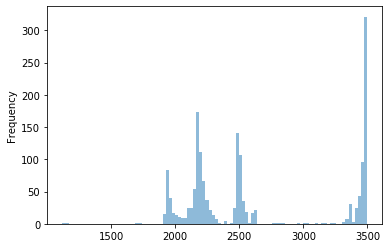

In [0]:
ax = df.height.plot.hist(bins=100, alpha=0.5)

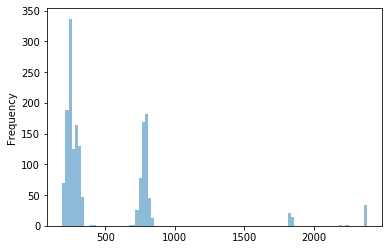

In [0]:
ax = df.width.plot.hist(bins=100, alpha=0.5)

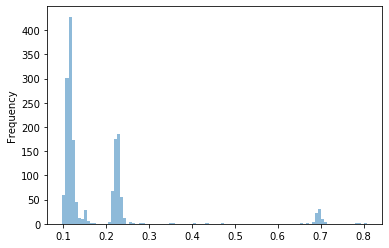

In [0]:
ax = df.ratio.plot.hist(bins=100, alpha=0.5)

# Use RFC to define num of core samples in the images

In [0]:
x_train = df.query('id_0 != 0')[['ratio', 'height', 'width', 'length']]
x_test = df.query('id_0 == 0')[['ratio', 'height', 'width', 'length']]

In [0]:
y_train = df.query('id_0 != 0')['id_0'].map({6201: 0, 6204: 0, 6406: 1, 6506: 1, 6507: 2}).rename('label')
y_test = df.query('id_0 == 0')['id_0'].rename('label') + 1

In [0]:
if False:
  rfc = RandomForestClassifier(random_state=42, n_jobs=-1)

  param_grid = { 
      'n_estimators': [20, 30, 40, 50, 60],
      'max_depth' : [2, 3, 4, 5, 6, 7, 8],
      'min_samples_split': [2, 4, 6],
      'min_samples_leaf': [2, 4, 6],
  }

  CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, verbose=2, scoring='accuracy')
  CV_rfc.fit(*shuffle(x_train, y_train))

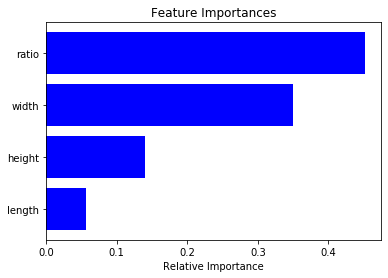

Test: 1.0
Train: 1.0


In [0]:
try:
  print('Best params:', CV_rfc.best_params_)
  rfc = CV_rfc.best_estimator_
except:
  pass

rfc = RandomForestClassifier(random_state=42, n_jobs=-1, **{ 
    'n_estimators': 40,
    'max_depth' : 3,
    'min_samples_split': 2,
    'min_samples_leaf': 2,
})

rfc.fit(x_train, y_train)

# Plot feature importance
features = x_train.columns
importances = rfc.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

print('Test:', accuracy_score(y_test, rfc.predict(x_test)))
print('Train:', accuracy_score(y_train, rfc.predict(x_train)))

In [0]:
df['img_kind'] = rfc.predict(df[['ratio', 'height', 'width', 'length']])
df[df.img_name == 'Aramco/6204 11-1/Core_images/2205_02_2013-2026m.jpg'].img_kind

1629    0
Name: img_kind, dtype: int64

# Fix dump data

Ratio: 1633    0.691164
Name: ratio, dtype: float64
Length: 1633    5
Name: length, dtype: int64


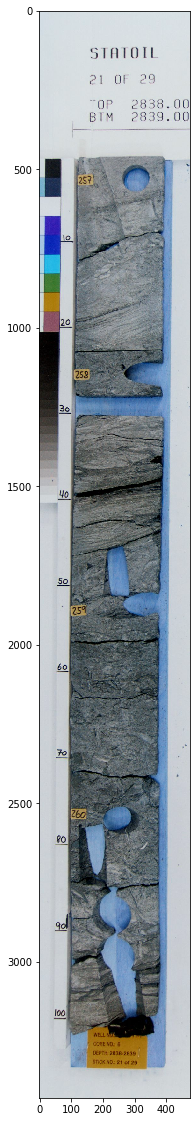

KeyboardInterrupt: ignored

In [0]:
dim = 32
new_size = (dim, dim*10)

queries = [
           '0.68 < ratio < 0.72',
           '0.1 < ratio < 0.12',
           '0.22 < ratio < 0.24',
]

cores = []
for query in queries: 
  selection = df.query(query).sample(1)
  print('Ratio:', selection.ratio)
  print('Length:', selection['length'])

  img_name = selection.img_name.values[0]
  # core_img = load_image(img_name) 
  core_img = np.int32(cv2.imread(img_name))

  if selection.img_kind.values == 0:
    height, width = core_img.shape[:2]
    top_f = 0.05
    bottom_f = 0.95
    cores_f = np.linspace(0.1, 0.9, 5)

    for center in cores_f:
      width_f = 0.1
      cores.append(core_img[:, int((center - width_f) * width):int((center + width_f) * width)])
      
      show(cores[-1])

      def get_midpoint(core_img, thresh=0.5, vert=True):
        if vert:
          middle = int(core_img.shape[1] // 2)
          sample = core_img[:, middle - 1:middle + 2].mean(1)[:, None]
          map_ = core_img.copy() - sample
          distr = (map_.mean(0) ** 2).mean(1)

        else:
          middle = int(core_img.shape[0] // 2)
          sample = core_img[middle - 1:middle + 2, :].mean(0)[None]
          map_ = core_img.copy() - sample
          distr = (map_.mean(1) ** 2).mean(1)

        mean = distr.mean()
        midpoint = np.arange(len(distr))[distr >= thresh*mean].mean()

        return midpoint

      midpoint_v = get_midpoint(cores[-1], vert=True)
      midpoint_h = get_midpoint(cores[-1], vert=False)

      input([midpoint_v, midpoint_h])
      plt.hist(distr)
      plt.show()
      plt.plot(distr)
      plt.show()

      input(map_.dtype)

    # plt.imshow(cores_f, np.array([2000]*5), s=100)
    show(core_img[int(top_f*height):int(bottom_f*height)])

  elif selection.img_kind.values == 1:
    true_ratio = 0.1
    crop_size = core_img.shape[1] / selection.ratio * (selection.ratio - true_ratio) // 2
    crop_size = int(crop_size)

    core_img = core_img[:, crop_size:-crop_size]


    show(core_img)
    # Resize image to make the DL model train faster
    res = cv2.resize(core_img, dsize=new_size, interpolation=cv2.INTER_CUBIC)
    show(res)
    cores.append(res)

    # fgMask = backSub.apply(core_img)

    # gray = cv2.cvtColor(core_img, cv2.COLOR_RGB2GRAY)
    # print(gray.shape)
    #edged = cv2.Canny(gray, 30, 200)

  # segmap = decode_segmap(img_name)
  # show(segmap)
  input()
  # show(core_img)

In [0]:
n_clusters=5

for id, row in df.query('upper > lower').iterrows():
  core_img = load_image(row['img_name'])
  print('Well:', row.id_0)
  print('Ratio:', row.ratio)
  print('Length:', row['lower'] - row['upper'])

  original_shape = core_img.shape

  # clf = cluster.KMeans(n_clusters=5)
  # clf = cluster.DBSCAN(eps=3, min_samples=5)
  # labels = clf.fit_predict(core_img[::50].reshape(-1, 3)).reshape(core_img[::50].shape[:2])

  # labels_ = clf.labels_
  # # Number of clusters in labels, ignoring noise if present.
  # n_clusters_ = len(set(labels_)) - (1 if -1 in labels_ else 0)
  # n_noise_ = list(labels_).count(-1)
  # print(n_clusters_, n_noise_)


  # print(core_img[::100].reshape(-1, 3).shape)
  # input(labels.shape)
  # show(core_img, (5, 10))
  for _ in  range(3):
    sns.distplot(core_img[::50, :, _].ravel())

  # plt.imshow(core_img[::50])
  plt.show()
  

# Check depth values 